# Project: No-show appointments data analysis [original source- Kaggle]

<a id='intro'></a>
## Introduction

### Dataset Description 

> The no-show appointment dataset provides data on 100K medical appointments and which patients are no-show among these medical appointments. This dataset provides attributes for each patient that can be related to them not showing up for their appointment. 

The column names are (descriptions from Kaggle): 
Patient ID: Identifier for the patient.
Appointment ID: Identifier for each appointment.
Gender: Identifer for the gender of the patient.
ScheduledDay- the day the patient made the appointment.
AppointmentDay- the day of the appointment.
Neighborhood- provides the location of the hospital.
Scholarship- if the patient is enrolled in a Brasilian welfare program, Bolsa Familia.
SMS- 1 or more messages sent to the patient.
Hipertension- Whether the patient has this diagnosis. Yes or no values.
Diabetes- Whether the patient has this diagnosis. Yes or no values. 
Alcoholism- Whether the patient has this diagnosis. Yes or no values. 
Handicap- If the patient is handicap, True or False values.


### Question(s) for Analysis
> I am analyzing the dependent variable of a no-show for a medical appointment and the three independent variables of scholarship, neighborhood and age. 
> Is there a correlation between the patient being part of a Brasilian welfare program and a no-show for their appointment? 
> Is there a correlation between the patient being part of a particular neighboord and a no-show for their appointment? 
>Is there a correlation between the patient being a particular age and a no-show for their appointment? 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Reading in the dataset of no-show appointments with pandas. 

In [3]:
no_show_df = pd.read_csv('noshowappointments.csv')


Checking all the columns in the dataset.

In [4]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Dimension of the dataset.

In [5]:
no_show_df.shape

(110527, 14)

Statistics summary of the numerical values of the dataset.

In [6]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Analyzing for any null values in the dataset.

In [7]:
no_show_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Evaluation from above table: No null values in the dataset. 

Understanding the distribution pattern of the attributes with numerical values in the no_show dataset.

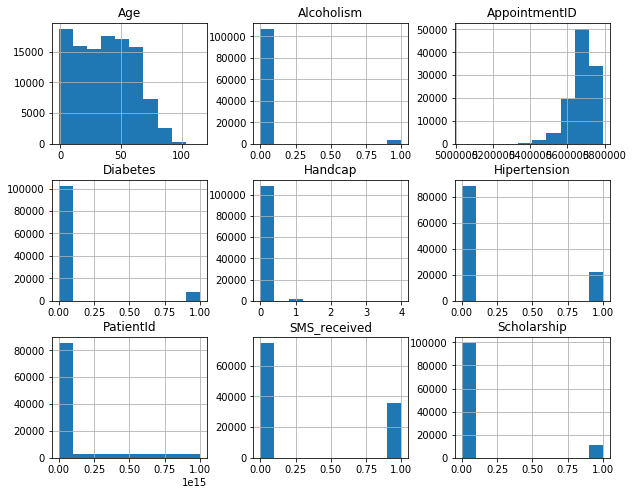

In [8]:
no_show_df.hist(figsize=(10,8));

Further analyzing the data by checking for duplicate values. 

In [9]:
sum(no_show_df.duplicated()) 

0


### Data Cleaning

#### Replacing Column Names

Replacing No-show to NoShow and SMS_received to SMSreceived to be consistent with other column names such as PatientId, ScheduledDay.

In [10]:
no_show_df.rename(columns = {'No-show': 'NoShow', 'SMS_received' : 'SMSreceived'}, inplace = True)
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Does a patient's scholarship enrollment status have an association with their no-show status for their medical appointment?

1. Create a dataframe for patients that no-showed for their appointment.

In [11]:
df_no_show = no_show_df[no_show_df['NoShow'] == 'Yes'];
Sch_No_Show = df_no_show.query('Scholarship == "1"')
Sch_No_Show

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31T17:06:17Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
123,3.673278e+13,5621388,F,2016-04-26T10:12:46Z,2016-04-29T00:00:00Z,31,BELA VISTA,1,0,0,0,0,1,Yes
128,9.488697e+14,5571842,F,2016-04-12T09:41:01Z,2016-04-29T00:00:00Z,34,PRAIA DO SUÁ,1,0,0,0,0,1,Yes
136,3.428312e+12,5587516,F,2016-04-15T08:45:32Z,2016-04-29T00:00:00Z,33,BONFIM,1,0,0,0,0,1,Yes
166,9.666857e+12,5557543,F,2016-04-07T14:38:22Z,2016-04-29T00:00:00Z,42,BONFIM,1,0,0,0,0,1,Yes
185,6.642793e+13,5521733,F,2016-03-29T12:27:35Z,2016-04-29T00:00:00Z,35,SÃO JOSÉ,1,0,0,0,0,1,Yes
237,5.369588e+12,5623002,F,2016-04-26T13:23:55Z,2016-04-29T00:00:00Z,27,CARATOÍRA,1,0,0,0,0,1,Yes


Calculation for percentage of patients that no-showed for their appointments with a scholarship.

In [12]:
Sch_No_Show['Scholarship'].count()

2578

In [13]:
Scholarship_No_Show_percentage = (Sch_No_Show['Scholarship'].count()/no_show_df['Scholarship'].count()) * 100
Scholarship_No_Show_percentage

2.3324617514272528

Calculation for percentage of patients without a scholarship and did not show up for their medical appointments. 

In [14]:
No_Sch_No_Show = df_no_show.query('Scholarship == "0"')
No_Sch_No_Show['Scholarship'].count()

19741

In [15]:
No_Scholarship_No_Show_Percentage = (No_Sch_No_Show['Scholarship'].count()/no_show_df['Scholarship'].count()) * 100
No_Scholarship_No_Show_Percentage

17.860794195083553

2. Create a dataframe for patients that did show up for their appointment.

In [16]:
df_show_up = no_show_df[no_show_df['NoShow'] == 'No']
df_show_up

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No


Creating stacked histograms to show the number of patients
who are enrolled in a scholarship and their appointment status of no-show for their medical appointment. And to show the number of patients who are not enrolled in a scholarship and their appointment status of no-show.

source for x_ticks_labels- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

source for x_ticks- 
https://pythonguides.com/matplotlib-set-xticks/

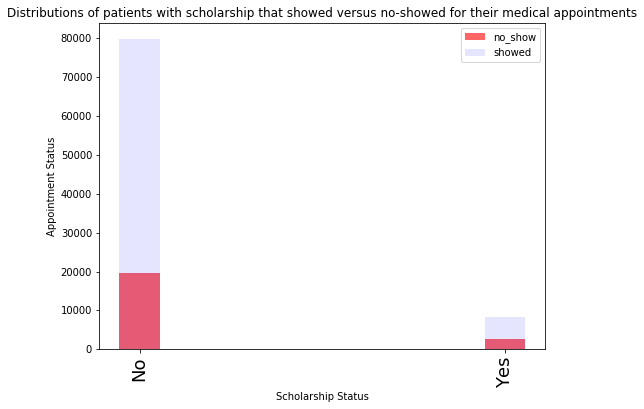

In [17]:
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_no_show['Scholarship'], alpha=0.6,label='no_show', color='red')
ax.hist(df_show_up['Scholarship'], alpha=0.1, label='showed', color = 'blue')
ax.set_title('Distributions of patients with scholarship that showed versus no-showed for their medical appointments')
ax.set_xlabel('Scholarship Status')
x_ticks_labels = ['No','Yes']
ax.set_xticks([0.05,0.95])
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
ax.set_ylabel('Appointment Status')
ax.legend(loc='upper right')
plt.show();

### Research Question 2: Is there an association between certain neighbourhoods and the patients that are no show for their appointment?

Plotting the number of patients from each neighbourhood against the patients that no showed for their appointments.

source for changing fontsize of the title, x-axis and y-axis-https://www.tutorialspoint.com/how-to-increase-plt-title-font-size-in-matplotlib

In [18]:
df_no_show = no_show_df[no_show_df['NoShow'] == 'Yes'];

Creating a function named plot neighbourhood graph for the title, xlabel and ylabel for the bar graph and 
calling this function when creating the same type of plot in input 39.

Source- https://www.w3schools.com/python/python_functions.asp

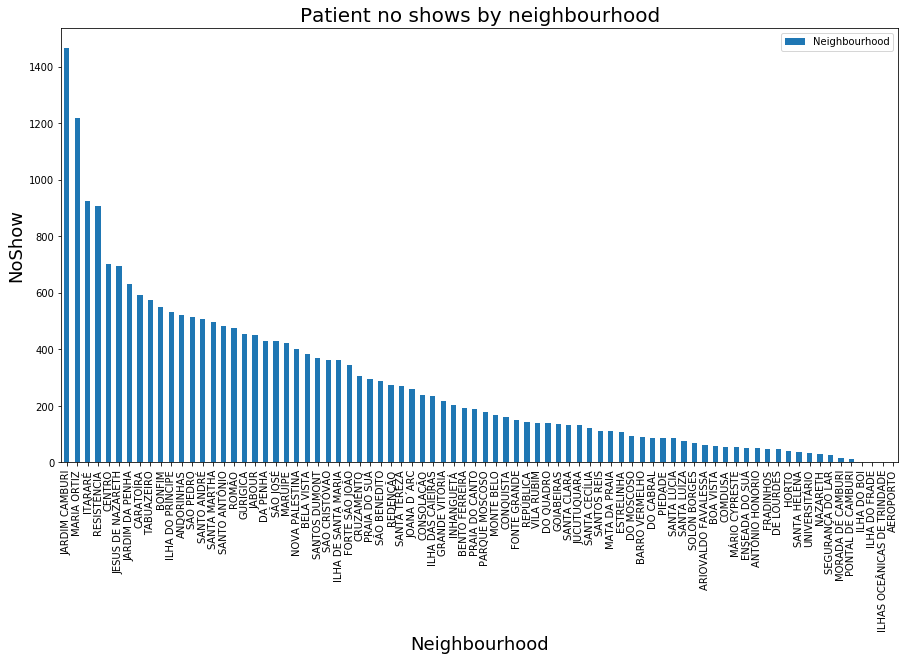

In [38]:
def plot_neighbourhood_graph(title, xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=20)
    plt.legend()
    
df_no_show['Neighbourhood'].value_counts().plot(kind='bar', figsize=(15,8));  
plot_neighbourhood_graph("Patient no shows by neighbourhood", "Neighbourhood", "NoShow")

Is there an association between certain neighbourhoods and the patients that show up for their appointment? 

Plotting the number of patients from each neighbourhood against the patients that showed up for their appointments.

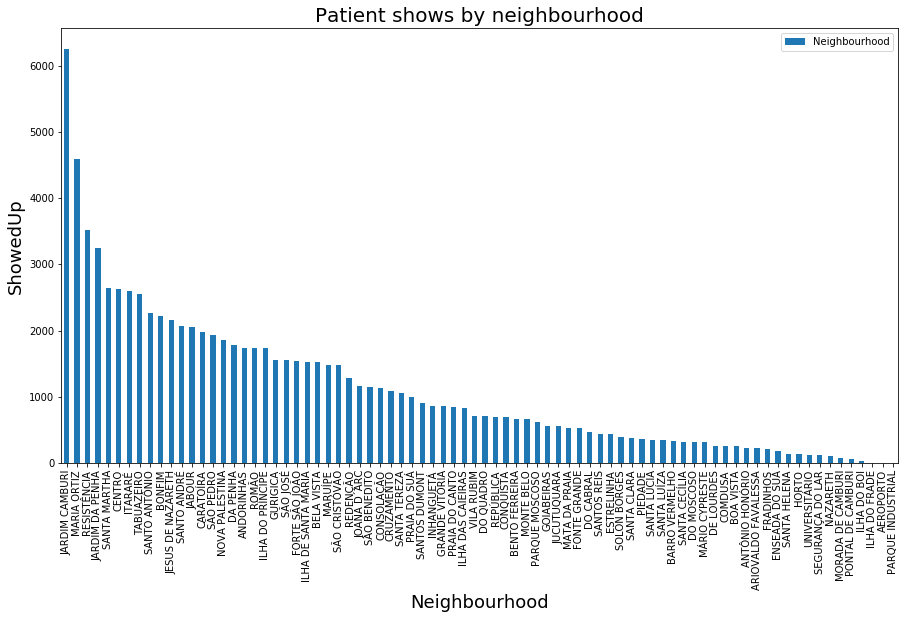

In [39]:
df_show_up['Neighbourhood'].value_counts().plot(kind='bar', figsize=(15,8));
plot_neighbourhood_graph("Patient shows by neighbourhood", "Neighbourhood", "ShowedUp")

### Research Question 3: Is there an association between the age of the patient, and their medical appointment status of a no-show?

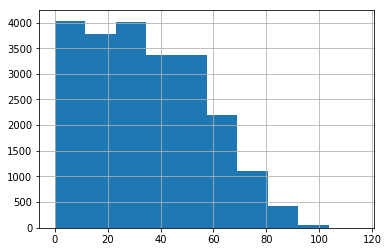

In [40]:
df_no_show['Age'].hist();

Summary statistics of patients that no-show for their appointments and their average age, the maximum age, the range of ages.

In [41]:
df_no_show['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

Is there an association between the age of the patient, and their medical appointment status of showing up for their appointment?

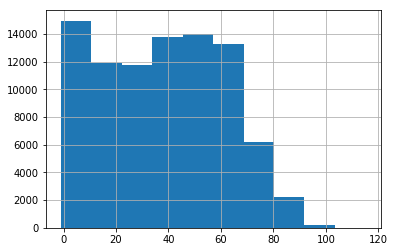

In [42]:
df_show_up['Age'].hist();


Summary statistics of patients that show for their appointments and their average age, the maximum age, the range of ages.

In [43]:
df_show_up['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

<a id='conclusions'></a>
## Conclusions

#### 1. Does a patient's scholarship enrollment status have an association with their no-show status for their medical appointment?
 
The percentage of patients enrolled in a scholarship called Brasilian welfar program and did not show up for their medical appointments was 2.3% versus 17% of patients not enrolled in a scholarship and did not show up for their appointment therefore there is little to no association between a patient's scholarship status and their appointment status of no-show. 

#### 2. Is there an association between certain neighbourhoods and the patients that are no show for their appointment?¶

Jardim Camburi was the neighbourhood that was highlighted in the bar graph representation in the comparison of the same neighbourhoods among the patients, who did show up versus did not show up for their appointments. It was highlighted because the largest portion of no-shows were from Jardim Camburi and the largest portion of patients that did show up were also from Jardim Camburi.

The distribution in the bar graph of the no-show patients versus patients that did show up from the same neighbourhoods does not show an association between the patient's appointment status of no show and patient living in a certain neighbourhood. 

#### 3. Is there an association between the age of the patient, and their medical appointment status of a no-show?

The average age of a patient that no-showed for an appointment was 34 versus the average age of a patient that showed for their appointment was 37. Based on this, it seems that patients that no-show are younger than patients who show up for their medical appointments. 

#### What was one limitation with the no-show appointment dataset?

A limitation was the sample size of the variable analyzed, which was the patients who no-showed because the sample size for patients with no-show status was about 20% of the total patient count. The small sample size was challenging to perform an analysis among the same independent variables for patients who no-showed and patients who did show up for their medical appointment. One cannot make a reliable comparison and confidently conclude what attributes have an correlation between a patient not showing up for their medical appointment. 

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0